In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #作图工具
import statsmodels.api as sm #估计线性模型需要引入的接口
import scipy.stats as sc #pyton做统计分析的时候使用的统计包
import math #进行数学运算
import statsmodels.tsa.ar_model as sma
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

# Problem 2.3

# 统计特征

In [2]:
unempl=pd.read_csv(r'C:\Users\zoe_x\Documents\python\Tsay3 data\m-unrate.txt',delim_whitespace=True, header=0)#导入数据为DataFrame，delim_whitespace表示遇到空格即分隔，header=0表示识别第一行为列名

In [3]:
unempl.head(5)

,Year,Mon,Day,Rate
0,1948,1,1,3.4
1,1948,2,1,3.8
2,1948,3,1,4.0
3,1948,4,1,3.9
4,1948,5,1,3.5


In [4]:
unempl['Rate'].describe() #只对最后一列做描述性统计

count    735.000000
mean       5.606803
std        1.500511
min        2.500000
25%        4.500000
50%        5.500000
75%        6.600000
max       10.800000
Name: Rate, dtype: float64

In [5]:
unrt=np.array(unempl['Rate'])

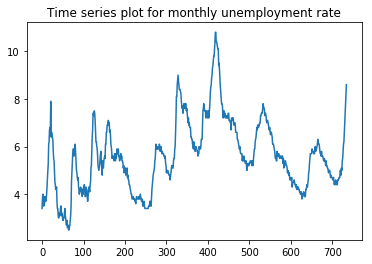

In [6]:
plt.plot(range(len(unrt)),unrt)
plt.title('Time series plot for monthly unemployment rate')#定义上述画布的名称
plt.show()#将编写的画布展示出来，类似print

# 平稳性检验

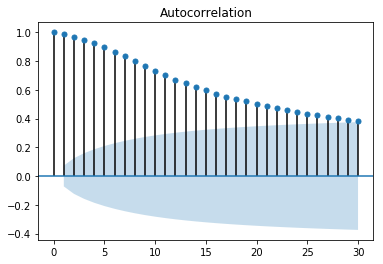

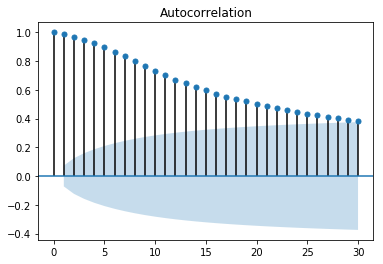

In [7]:
plot_acf(unrt,lags=30)#现成的package，在上面已经导入过，画出acf图像

In [8]:
print('adf test has p-value equal to '+str(adfuller(unrt)[1]))#adfuller(unrt)是对unrt做adf检验（检验结果为数组，可以print看看），adfuller(unrt)[1]是取其中的p值

adf test has p-value equal to 0.060769908911407294


In [9]:
adfuller(unrt)

(-2.7828207739728703,
 0.060769908911407294,
 12,
 722,
 {'1%': -3.439439614524914,
  '5%': -2.865551414233055,
  '10%': -2.5689061365397747},
 -297.05252289679424)

失业率在5%的显著水平上无法拒绝非平稳序列，同时ACF图像表示失业率数据非平稳。

失业率一阶差分数据 ADF 检验 与 ACF 图像判别
adf test has p-value equal to 3.08148466106747e-12


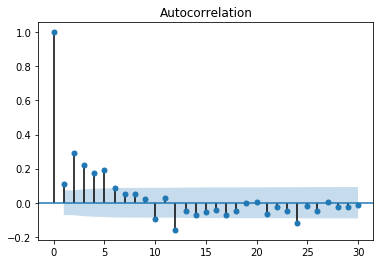

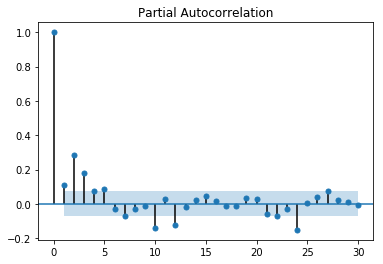

In [10]:
print('失业率一阶差分数据 ADF 检验 与 ACF 图像判别')
dunrt=np.diff(unrt)
plot_acf(dunrt,lags=30)
plot_pacf(dunrt,lags=30)
print('adf test has p-value equal to '+str(adfuller(dunrt)[1]))

一阶差分的失业率数据拒绝非平稳序列，同时ACF图像表示失业率数据平稳。值得注意的是，ACF在lag=12与lag=24有明显的相关性增长，说明存在年度周期性变化

# 模型拟合

In [11]:
aic=np.zeros(shape=25) #产生有25个0的array（为什么是25——大概是因为前面说12、24的位置有周期性，这里是把lag的最大值放置在25这边了）
bic=np.zeros(shape=25) #产生有25个0的array

In [12]:
for i in range(1,25):
    mod=sm.tsa.ARMA(dunrt,(i,0)).fit() #dunrt是差分以后的array，（i，0）表示拟合AR（i）模型
    aic[i]=mod.aic #可以依次得到AR（1）-AR（24）模型的aic的值
    bic[i]=mod.bic #可以依次得到AR（1）-AR（24）模型的bic的值


In [13]:
aic #注意，因为aic是从i=1开始被赋值的（赋到i=25），所以aic[0]是没有赋值的，所以仍然是0，这就解释了下面求令aic最大的切片需要+1的原因

array([   0.        , -170.47049067, -232.22363618, -255.43935644,
       -258.02857507, -261.93221257, -260.36159712, -262.27836869,
       -260.84396355, -258.9218717 , -271.27531642, -269.91840384,
       -278.58749064, -276.84198877, -275.1401003 , -274.73422504,
       -273.06135638, -271.09769274, -269.151815  , -268.03673896,
       -266.83306494, -267.7673699 , -268.73406881, -267.67941217,
       -286.59415293])

In [14]:
np.argmin(aic[1:]) #直接计算使aic最大的数是第几个，一般会从所给起点（即aic[1]被当作0位置）开始计算，这样最大的数就会给成是23（但第23个数实际上对应的是AR（24））

23

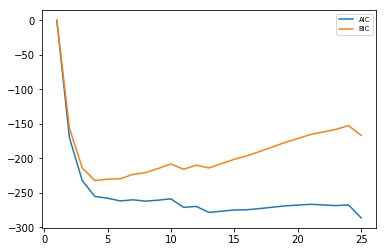

其实图中的25标对应应该是AR（24），这个和位置所标数字有关，可以理解
minimum value for AIC is time lag 24
minimum value for BIC is time lag 3


In [16]:
plt.plot(range(1,26),aic,label='AIC') #做出相应AR模型的aic值得图
plt.plot(range(1,26),bic,label='BIC')
plt.legend(fontsize='x-small',loc='upper right') #图例显示字体大小和位置
plt.show()
print('其实图中的25标对应应该是AR（24），这个和位置所标数字有关，可以理解')
print('minimum value for AIC is time lag '+str(1+np.argmin(aic[1:]))) #argmin就是找出使aic最小是第几个数，为什么要+1上面一条命令解释了
print('minimum value for BIC is time lag '+str(1+np.argmin(bic[1:]))) 

# AIC准则设立模型

In [17]:
mod=sm.tsa.ARMA(dunrt,(24,0)).fit()
print(mod.summary())
pred=mod.predict(start=len(dunrt),end=len(dunrt)+4)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  734
Model:                    ARMA(24, 0)   Log Likelihood                 169.297
Method:                       css-mle   S.D. of innovations              0.192
Date:                Wed, 15 Apr 2020   AIC                           -286.594
Time:                        14:21:52   BIC                           -167.033
Sample:                             0   HQIC                          -240.478
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.009      0.611      0.541      -0.013       0.024
ar.L1.y       -0.0049      0.036     -0.134      0.894      -0.076       0.067
ar.L2.y        0.2193      0.037      6.008      0.0

In [18]:
print('\n')
print('Prediction for Unemployment Rate')#用差分项回归，需要还原失业率（因为之前对失业率进行一阶差分是后一个减前一个，因此预测的第一个数需要加上前一个数才是实际的第一个预测值）
p1=pred[0]+unrt[-1]
print('April '+str(p1))
p2=pred[0]+p1
print('May   '+str(p2))
p3=pred[0]+p2
print('June  '+str(p3))
p4=pred[0]+p3
print('July  '+str(p4))



Prediction for Unemployment Rate
April 8.850839593305405
May   9.101679186610811
June  9.352518779916217
July  9.603358373221623


mean of residual is 0.00030975617802071395
std of residual is 0.19282672008827065


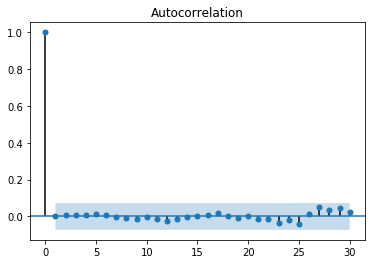

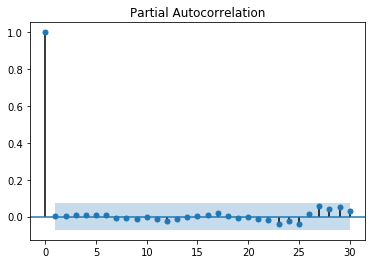

In [20]:
plot_acf(mod.resid,lags=30)
plot_pacf(mod.resid,lags=30)
print('mean of residual is '+str(np.average(mod.resid)))
print('std of residual is '+str(np.std(mod.resid)))

上面是对模型残差的检验，应该说是比较接近白噪声的

# 模型优化——去掉不显著变量

下面文字复制助教的note：这一节涉及到部分同学提出的问题，我并未在statsmodel的包中找到可以去掉不显著变量或者选择性添加非连续滞后项的ARMA模型的方法，于是使用OLS中的稳健标准误进行回归。这部分内容感兴趣的同学可以参考。去掉之后发现AIC和BIC比此前连续的ARMA模型提升很多。

In [21]:
X=pd.DataFrame({'L2':dunrt[22:len(dunrt)-2],
                'L3':dunrt[21:len(dunrt)-3],
                'L4':dunrt[20:len(dunrt)-4],
                'L5':dunrt[19:len(dunrt)-5],
                'L10':dunrt[14:len(dunrt)-10],
                'L12':dunrt[12:len(dunrt)-12],
                'L24':dunrt[0:len(dunrt)-24],})#生成滞后变量

In [24]:
X.head() #为什么像上面这样生成滞后变量，猜测可能是因为要保证滞后变量列都要有同样多的数据，从最大滞后的24阶看，往回要到原差分数据的0位置，就决定了每一列数据必须要有710个那么长。

,L2,L3,L4,L5,L10,L12,L24
0,0.2,-1.5,1.3,-0.2,0.3,0.4,0.4
1,-0.1,0.2,-1.5,1.3,0.8,0.3,0.2
2,-0.1,-0.1,0.2,-1.5,0.1,0.3,-0.1
3,-0.1,-0.1,-0.1,0.2,0.5,0.8,-0.4
4,-0.5,-0.1,-0.1,-0.1,0.1,0.1,0.1


In [23]:
len(dunrt)

734

In [25]:
mod_ar_self=sm.OLS(dunrt[24:len(dunrt)],X).fit(cov_type='HC0')
#有同学提到寻找参数的取值范围，和object对象的属性命令方法如何寻找。参数范围一般在函数help中查找，
#属性对象的命令如sm.OLS.fit()，fit即为属性命令，可以用OLS=sm.OLS(dunrt[24:len(dunrt)],X),print(dir(OLS))查找。
print(mod_ar_self.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     19.15
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.73e-23
Time:                        14:50:47   Log-Likelihood:                 215.10
No. Observations:                 710   AIC:                            -416.2
Df Residuals:                     703   BIC:                            -384.3
Df Model:                           7                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L2             0.2032      0.041      4.932      0.0

In [26]:
pX=pd.DataFrame({'L2':dunrt[len(dunrt)-2:],#冒号后不加位置索引表示一直到最后一个数
                'L3':dunrt[len(dunrt)-3:len(dunrt)-1],
                'L4':dunrt[len(dunrt)-4:len(dunrt)-2],
                'L5':dunrt[len(dunrt)-5:len(dunrt)-3],
                'L10':dunrt[len(dunrt)-10:len(dunrt)-8],
                'L12':dunrt[len(dunrt)-12:len(dunrt)-10],
                'L24':dunrt[len(dunrt)-24:len(dunrt)-22],})#生成滞后变量

In [27]:
pX

,L2,L3,L4,L5,L10,L12,L24
0,0.5,0.3,0.5,0.3,0.1,-0.1,0.1
1,0.4,0.5,0.3,0.5,0.3,0.4,-0.1


In [28]:
pred=mod_ar_self.predict(pX) #意思是往后两步预测

In [29]:
pred

0    0.228969
1    0.165282
dtype: float64

In [30]:
L2p=np.append(dunrt[len(dunrt)-2:],pred[0])#表示在数组dunrt[len(dunrt)-2:]后添加元素
L2p=np.append(L2p,pred[1])
L3p=np.append(dunrt[len(dunrt)-3:],pred[1])

In [31]:
L2p

array([0.5       , 0.4       , 0.22896907, 0.16528157])

In [32]:
pX=pd.DataFrame({'L2':L2p,
                'L3':L3p,
                'L4':dunrt[len(dunrt)-4:len(dunrt)],
                'L5':dunrt[len(dunrt)-5:len(dunrt)-1],
                'L10':dunrt[len(dunrt)-10:len(dunrt)-6],
                'L12':dunrt[len(dunrt)-12:len(dunrt)-8],
                'L24':dunrt[len(dunrt)-24:len(dunrt)-20],})#L2和L3需要引入预测变量生成滞后变量，再进行预测

In [33]:
pX

,L2,L3,L4,L5,L10,L12,L24
0,0.500000,0.300000,0.5,0.3,0.1,-0.1,0.1
1,0.400000,0.500000,0.3,0.5,0.3,0.4,-0.1
2,0.228969,0.400000,0.5,0.3,0.3,0.1,0.2
3,0.165282,0.165282,0.4,0.5,0.1,0.3,0.0


In [34]:
pred=mod_ar_self.predict(pX)

In [36]:
print(pred)
print('\n')
print('Prediction for Unemployment Rate')
p1=pred[0]+unrt[-1]
print('April '+str(p1)) #和之前的一样，需要加回差分项
p2=pred[0]+p1
print('May   '+str(p2))
p3=pred[0]+p2
print('June  '+str(p3))
p4=pred[0]+p3
print('July  '+str(p4))

0    0.228969
1    0.165282
2    0.123137
3    0.104677
dtype: float64


Prediction for Unemployment Rate
April 8.828969070998834
May   9.057938141997669
June  9.286907212996503
July  9.515876283995338


# Problem 2.4

In [37]:
dclret=pd.read_csv(r'C:\Users\zoe_x\Documents\python\Tsay3 data\m-deciles08.txt',delim_whitespace=True, header=0)
print(dclret.head())
dcl1=np.array(dclret['CAP1RET'])
dcl2=np.array(dclret['CAP2RET'])
dcl9=np.array(dclret['CAP9RET'])
dcl10=np.array(dclret['CAP10RET'])
print('Decile 2 pvalue of box-ljung Q Statistics is \n'+str(acorr_ljungbox(dcl2,lags=12)[1]))   #看最后一个就可以
print('Decile 10 pvalue of box-ljung Q Statistics is \n'+str(acorr_ljungbox(dcl10,lags=12)[1])) #看最后一个就可以

       date   CAP1RET   CAP2RET   CAP9RET  CAP10RET
0  19700130  0.054383 -0.004338 -0.073082 -0.076874
1  19700227  0.020264  0.020155  0.064185  0.059512
2  19700331 -0.031790 -0.028090 -0.004034 -0.001327
3  19700430 -0.184775 -0.193004 -0.115825 -0.091112
4  19700529 -0.088189 -0.085342 -0.085565 -0.053193
Decile 2 pvalue of box-ljung Q Statistics is 
[9.83783872e-06 4.53927451e-05 7.17337560e-05 1.58917824e-04
 2.77390814e-04 6.39939531e-04 1.29990298e-03 6.32896795e-04
 7.87509068e-04 1.04860742e-03 1.57963530e-03 1.33502495e-07]
Decile 10 pvalue of box-ljung Q Statistics is 
[0.37835467 0.5887199  0.73909931 0.86823815 0.2074974  0.23935894
 0.32838342 0.42206436 0.52013532 0.51336532 0.59737477 0.55590269]


发现decile2序列显著拒绝原假设，存在序列相关性，不是白噪声，所以可以进行模型拟合（而decile10不可以）

adf test has p-value equal to 3.493495777703393e-05


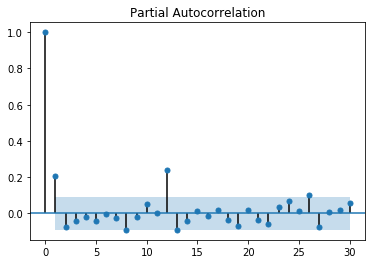

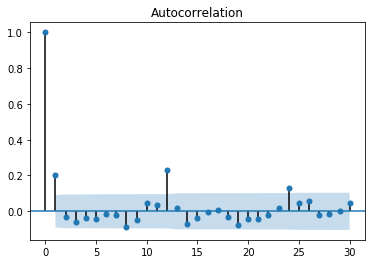

In [39]:
plot_pacf(dcl2,lags=30)
plot_acf(dcl2,lags=30)
print('adf test has p-value equal to '+str(adfuller(dcl2)[1]))

# AR model

In [40]:
mod=sm.tsa.ARMA(dcl2,(1,0)).fit()
print('AR(1) Model Summary')
print(mod.summary())
pred=mod.forecast(steps=13)
for i in range(1,13):
    print(str(i)+' step prediction is   '+str(pred[0][i])) #预测输出前两个array分别是预测值和std，因此pred[0]表示输出预测值array，而在这个array后面加切片[i],则表示需要输出预测值array里面对应的某个值
    print(str(i)+' step forecast std is '+str(pred[1][i])) #pred[1]表示输出std的array，而在这个array后面加切片[i],则表示需要输出相应array里面对应的某个值

AR(1) Model Summary
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  468
Model:                     ARMA(1, 0)   Log Likelihood                 622.554
Method:                       css-mle   S.D. of innovations              0.064
Date:                Wed, 15 Apr 2020   AIC                          -1239.108
Time:                        16:07:49   BIC                          -1226.663
Sample:                             0   HQIC                         -1234.211
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.004      2.825      0.005       0.003       0.018
ar.L1.y        0.2034      0.045      4.498      0.000       0.115       0.292
                                

In [41]:
pred #看一下pred输出的内容就知道为什么上面那么写了

(array([0.00383121, 0.00912777, 0.01020504, 0.01042415, 0.01046871,
        0.01047778, 0.01047962, 0.01048   , 0.01048007, 0.01048009,
        0.01048009, 0.01048009, 0.01048009]),
 array([0.06397727, 0.06528717, 0.06534079, 0.06534301, 0.0653431 ,
        0.0653431 , 0.06534311, 0.06534311, 0.06534311, 0.06534311,
        0.06534311, 0.06534311, 0.06534311]),
 array([[-0.12156194,  0.12922436],
        [-0.11883274,  0.13708827],
        [-0.11786056,  0.13827064],
        [-0.1176458 ,  0.13849409],
        [-0.11760141,  0.13853884],
        [-0.11759236,  0.13854791],
        [-0.11759051,  0.13854975],
        [-0.11759014,  0.13855013],
        [-0.11759006,  0.1385502 ],
        [-0.11759005,  0.13855022],
        [-0.11759004,  0.13855022],
        [-0.11759004,  0.13855022],
        [-0.11759004,  0.13855022]]))

# MA 模型

In [43]:
mod=sm.tsa.ARMA(dcl2,(0,1)).fit()
print('MA(1) Model Summary')
print(mod.summary())
pred=mod.forecast(steps=13)
for i in range(1,13):
    print(str(i)+' step prediction is   '+str(pred[0][i]))
    print(str(i)+' step forecast std is '+str(pred[1][i]))

MA(1) Model Summary
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  468
Model:                     ARMA(0, 1)   Log Likelihood                 623.467
Method:                       css-mle   S.D. of innovations              0.064
Date:                Wed, 15 Apr 2020   AIC                          -1240.933
Time:                        16:24:28   BIC                          -1228.488
Sample:                             0   HQIC                         -1236.036
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.004      2.917      0.004       0.003       0.018
ma.L1.y        0.2191      0.045      4.875      0.000       0.131       0.307
                                

# Problem 2.13

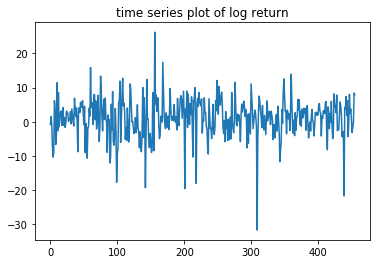

adf test has p-value equal to 1.0923198793802618e-29


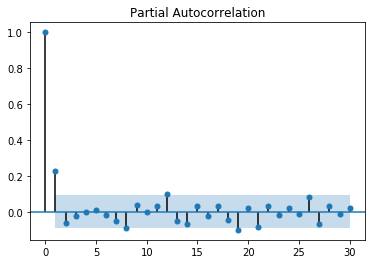

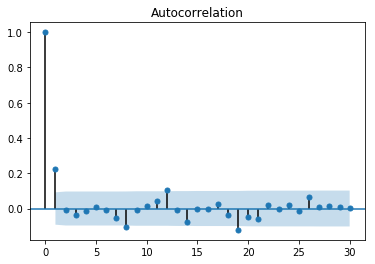

In [45]:
ewidx=pd.read_csv(r'C:\Users\zoe_x\Documents\python\Tsay3 data\m-ew6299.txt',names=np.array(['lgr']))
lgr=np.array(ewidx['lgr'])
plt.plot(range(len(lgr)),lgr)
plt.title('time series plot of log return')
plt.show()
plot_pacf(lgr,lags=30)
plot_acf(lgr,lags=30)
print('adf test has p-value equal to '+str(adfuller(lgr)[1]))

# AR model

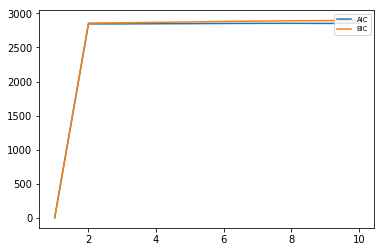

minimum value of AR model for AIC is time lag 1
minimum value of AR model for BIC is time lag 1


In [46]:
aic=np.zeros(shape=10)
bic=np.zeros(shape=10)
for i in range(1,10):
    mod=sm.tsa.ARMA(lgr,(i,0)).fit()
    aic[i]=mod.aic
    bic[i]=mod.bic
plt.plot(range(1,11),aic,label='AIC')
plt.plot(range(1,11),bic,label='BIC')
plt.legend(fontsize='x-small',loc='upper right')
plt.show()
print('minimum value of AR model for AIC is time lag '+str(1+np.argmin(aic[1:])))
print('minimum value of AR model for BIC is time lag '+str(1+np.argmin(bic[1:])))

In [52]:
mod=sm.tsa.ARMA(lgr,(1,0)).fit()
print(mod.summary())
print('\n')
print('pvalue of box-ljung Q Statistics is \n'+str(acorr_ljungbox(mod.resid,lags=12)[1]))
print('\n')
pred=mod.predict(start=len(lgr)+1,end=len(lgr)+2)
print('1 step prediction is '+str(pred[0]))
print('2 step prediction is '+str(pred[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  456
Model:                     ARMA(1, 0)   Log Likelihood               -1420.110
Method:                       css-mle   S.D. of innovations              5.448
Date:                Wed, 15 Apr 2020   AIC                           2846.221
Time:                        16:35:09   BIC                           2858.588
Sample:                             0   HQIC                          2851.093
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0627      0.330      3.223      0.001       0.416       1.709
ar.L1.y        0.2266      0.046      4.967      0.000       0.137       0.316
                                    Roots           

# MA model

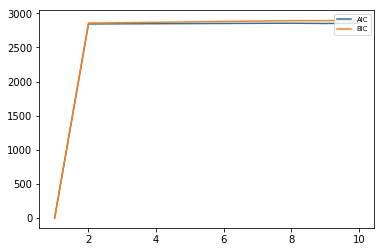

minimum value of MA model for AIC is time lag 1
minimum value of MA model for BIC is time lag 1


In [54]:
aic=np.zeros(shape=10)
bic=np.zeros(shape=10)
for i in range(1,10):
    mod=sm.tsa.ARMA(lgr,(0,i)).fit()
    aic[i]=mod.aic
    bic[i]=mod.bic
plt.plot(range(1,11),aic,label='AIC')
plt.plot(range(1,11),bic,label='BIC')
plt.legend(fontsize='x-small',loc='upper right')
plt.show()
print('minimum value of MA model for AIC is time lag '+str(1+np.argmin(aic[1:])))
print('minimum value of MA model for BIC is time lag '+str(1+np.argmin(bic[1:])))

In [55]:
mod=sm.tsa.ARMA(lgr,(0,1)).fit()
print(mod.summary())
print('\n')
print('pvalue of box-ljung Q Statistics is \n'+str(acorr_ljungbox(mod.resid,lags=12)[1]))
print('\n')
pred=mod.predict(start=len(lgr)+1,end=len(lgr)+2)
print('1 step prediction is '+str(pred[0]))
print('2 step prediction is '+str(pred[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  456
Model:                     ARMA(0, 1)   Log Likelihood               -1419.365
Method:                       css-mle   S.D. of innovations              5.439
Date:                Wed, 15 Apr 2020   AIC                           2844.730
Time:                        16:37:54   BIC                           2857.098
Sample:                             0   HQIC                          2849.602
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0611      0.315      3.365      0.001       0.443       1.679
ma.L1.y        0.2385      0.045      5.308      0.000       0.150       0.327
                                    Roots           